## RNN

### Theory

$$
\begin{aligned}
\bar{{\bf h}}^{(t)}=&{\bf W}_{{\bf x}{\bf h}}{\bf x}^{(t)}+{\bf W}_{{\bf h}{\bf h}}{\bf h}^{(t-1)}+ {\bf b}_{\bf h}\\
{\bf h}^{(t)} =& \tanh\left(\bar{{\bf h}}^{(t)}\right)\\
\bar{{\bf o}}^{(t)}=&{\bf W}_{{\bf h}{\bf o}}{\bf h}^{(t)}+{\bf b}_{\bf o}\\
{\bf o}^{(t)} =& f\left(\bar{{\bf o}}^{(t)}\right)\\
\mathcal{L}=&\sum_{t=1}^T\sum_{i=1}^d -y^{(t)}_i \log\left(o^{(t)}_i\right)\\
=&\sum_{t=1}^T-\log\left(o^{(t)}_{i_*^{(t)}}\right)\\
\text{where }&{i_*^{(t)}}=\arg\max_i\{y_i^{(t)}\}\text{ with }y_{i_*^{(t)}}^{(t)}=1 \\
&{\bf x}^{(t)}\in \mathbb{R}^d,{\bf h}^{(t)}\in \mathbb{R}^m, {\bf o}^{(t)}\in \mathbb{R}^d\\
&{\bf W}_{{\bf x}{\bf h}}\in\mathbb{R}^{m\times d},{\bf W}_{{\bf h}{\bf h}}\in\mathbb{R}^{m\times m},{\bf W}_{{\bf h}{\bf o}}\in \mathbb{R}^{d\times m},{\bf b}_{\bf h}\in \mathbb{R}^m,{\bf b}_{\bf o}\in \mathbb{R}^d\\
\frac{\partial \mathcal{L}}{\partial \bar{o}^{(t)}_j}&=\frac{\partial \mathcal{L}}{\partial {o}^{(t)}_{i_*^{(t)}}}\frac{\partial {o}^{(t)}_{i_*^{(t)}}}{\partial \bar{o}^{(t)}_j}=-\frac{1}{o_{i_{*}^{(t)}}^{(t)}}\frac{\mathbb{1}_\left\{j=i^{(t)}_*\right\}e^{\bar{o}^{(t)}_{i_*^{(t)}}}\left(\sum \cdot\right)-e^{\bar{o}^{(t)}_{i_*^{(t)}}}e^{\bar{o}^{(t)}_{j}}}{\left(\sum \cdot\right)^{2}}=-\frac{1}{o_{i_{*}^{(t)}}^{(t)}}\left(\mathbb{1}_\left\{j=i^{(t)}_*\right\}o_{i_{*}^{(t)}}^{(t)}-o_{i_{*}^{(t)}}^{(t)}o_{j}^{(t)}\right)=o_{j}^{(t)}-\mathbb{1}_\left\{j=i^{(t)}_*\right\}\\
&\frac{\partial \mathcal{L}}{\partial {\bf b}_{\bf o}}=\sum_{t=1}^{T} \frac{\partial \mathcal{L}}{\partial \bar{\bf o}^{(t)}}\frac{\partial \bar{\bf o}^{(t)}}{\partial {\bf b}_{\bf o}}=\sum_{t=1}^{T}I^\top\left({\bf o}^{(t)}-{\bf e}_{i^{(t)}_*}\right)=\sum_{t=1}^{T}{\bf o}^{(t)}-{\bf e}_{i^{(t)}_*}\\
&\frac{\partial \mathcal{L}}{\partial {\bf W}_{{\bf h}{\bf o}}}=\sum_{t=1}^{T} \frac{\partial \mathcal{L}}{\partial \bar{\bf o}^{(t)}}\frac{\partial \bar{\bf o}^{(t)}}{\partial {\bf W}_{{\bf h}{\bf o}}}=\sum_{t=1}^{T}\left({\bf o}^{(t)}-{\bf e}_{i^{(t)}_*}\right){{\bf h}^{(t)}}^\top\\
&\frac{\partial \mathcal{L}}{\partial {\bf h}^{(t)}}=\frac{\partial \mathcal{L}}{\partial {\bf h}^{(t+1)}}\frac{\partial {\bf h}^{(t+1)}}{\partial {\bf h}^{(t)}}+\frac{\partial \mathcal{L}}{\partial \bar{\bf o}^{(t)}}\frac{\partial \bar{\bf o}^{(t)}}{\partial {\bf h}^{(t)}}={\bf W}_{{\bf h}{\bf h}}^\top\text{diag}\left({\bf 1}-\left({{\bf h}^{(t+1)}}\right)^2\right)\frac{\partial \mathcal{L}}{\partial {\bf h}^{(t+1)}}+{\bf W}_{{\bf h}{\bf o}}^\top\left({\bf o}^{(t)}-{\bf e}_{i^{(t)}_*}\right)\\
&\frac{\partial \mathcal{L}}{\partial {\bf W}_{{\bf h}{\bf h}}}=\sum_{t=1}^{T} \frac{\partial \mathcal{L}}{\partial {\bf h}^{(t)}}\frac{\partial {\bf h}^{(t)}}{\partial {\bf W}_{{\bf h}{\bf h}}}=\sum_{t=1}^{T} \text{diag}\left({\bf 1}-\left({\bf h}^{(t)}\right)^2\right)\frac{\partial \mathcal{L}}{\partial {\bf h}^{(t)}}\left({\bf h}^{(t-1)}\right)^\top\\
&\frac{\partial \mathcal{L}}{\partial {\bf W}_{{\bf x}{\bf h}}}=\sum_{t=1}^{T} \frac{\partial \mathcal{L}}{\partial {\bf h}^{(t)}}\frac{\partial {\bf h}^{(t)}}{\partial {\bf W}_{{\bf x}{\bf h}}}=\sum_{t=1}^{T} \text{diag}\left({\bf 1}-\left({\bf h}^{(t)}\right)^2\right)\frac{\partial \mathcal{L}}{\partial {\bf h}^{(t)}}\left({\bf x}^{(t)}\right)^\top\\
\end{aligned}
$$

### Scratch

In [2]:
import numpy as np
from tqdm import tqdm
import re

In [222]:
class Reader:
    def __init__(self, fpath):
        self._fpath = fpath
        with open(self._fpath, 'r') as f:
            self.data = f.read()
            self.data = self.data.replace("\n", ' ')
            self.data = self.data.lower()
        self.data = re.sub(r'([\"\'])?([A-z]+[-\']?[A-z]+)?([\"\':,.?!])?', r'\1 \2 \3', self.data).split()
        chars = list(set(self.data))
        self.char_to_ix = {ch:i for i,ch in enumerate(chars)}
        self.ix_to_char = {i:ch for i,ch in enumerate(chars)}
        self.vocab_size = len(chars)

In [176]:
class RNN:
    def __init__(self, vocab_size, learning_rate=0.1, sequence_length=25, hidden_size=100):
        self._learning_rate = learning_rate # learning rate
        self._sequence_length = sequence_length
        self._hidden_size = hidden_size
        self._vocab_size = vocab_size
        np.random.seed(42)
        self._Wxh = np.random.randn(self._hidden_size,self._vocab_size)*0.01
        self._Whh = np.random.randn(self._hidden_size,self._hidden_size)*0.01
        self._Who = np.random.randn(self._vocab_size,self._hidden_size)*0.01
        self._bh = np.zeros(hidden_size)
        self._bo = np.zeros(vocab_size)
    
    def _softmax(self, x):
        ex = np.exp(x-max(x))
        return ex/np.sum(ex)
        
    def loss(self, os, y):
        return sum(-np.log(max(os[t][y[t]],0.1/self._vocab_size)) for t in range(self._sequence_length))
        # mind the \
        # return loss using Xentropy
        
    
    def forward(self, inputs, hprev):
        xs, hs, os = {}, {}, {}
        hs[-1] = hprev
        for t in range(self._sequence_length):
            xs[t] = np.zeros(self._vocab_size)
            xs[t][inputs[t]] = 1
            hs[t] = np.tanh(self._Wxh@xs[t]+self._Whh@hs[t-1]+self._bh)
            os[t] = self._softmax(self._Who@hs[t]+self._bo)
        return xs, hs, os

    
    def backward(self, xs, hs, os, y):
        dbo, dbh = np.zeros_like(self._bo), np.zeros_like(self._bh)
        dWho, dWhh, dWxh = np.zeros_like(self._Who), np.zeros_like(self._Whh), np.zeros_like(self._Wxh)
        dhnext = np.zeros(self._hidden_size)
        for t in range(self._sequence_length-1,-1,-1):
            do = np.zeros(self._vocab_size)+os[t]
            do[y[t]] -= 1
            dh = (1-hs[t]**2)*(self._Who.T@do+dhnext)
            dhnext = self._Whh.T@dh
            dbo += do
            dbh += dh
            dWho += np.outer(do,hs[t])
            dWhh += np.outer(dh,hs[t-1])
            dWxh += np.outer(dh,xs[t])
        for dparam in (dbo, dbh, dWho, dWhh, dWxh):
            np.clip(dparam, -5, 5, out=dparam)
        return dbo, dbh, dWho, dWhh, dWxh
    
    def fit(self, reader, epoch):
        smooth_loss = -np.log(1.0/self._vocab_size)*self._sequence_length
        mbo, mbh = np.zeros_like(self._bo), np.zeros_like(self._bh)
        mWho, mWhh, mWxh = np.zeros_like(self._Who), np.zeros_like(self._Whh), np.zeros_like(self._Wxh)
        
        for _ in tqdm(range(epoch)): 
            n = 0
            hprev = np.zeros(self._hidden_size)
            for p in range(0, len(reader.data)-self._sequence_length, self._sequence_length):
                inputs = [reader.char_to_ix[ch] for ch in reader.data[p:p+self._sequence_length]]
                #print(inputs)
                y = inputs[1:]+[reader.char_to_ix[reader.data[p+self._sequence_length]]]
                #print(y)
                xs, hs, os = self.forward(inputs, hprev)
                dbo, dbh, dWho, dWhh, dWxh = self.backward(xs, hs, os, y)
                #print(dWho)
                for param, dparam, mem in zip((self._bo, self._bh, self._Who, self._Whh, self._Wxh),
                                              (dbo, dbh, dWho, dWhh, dWxh),
                                              (mbo, mbh, mWho, mWhh, mWxh)):
                    mem += dparam*dparam
                    param += -self._learning_rate*dparam/np.sqrt(mem+1e-8)
                hprev = hs[self._sequence_length-1]
                smooth_loss = smooth_loss * 0.999 + self.loss(os, y) * 0.001
                n+=1
                if n%400 == 0:
                    print(f"loss: {smooth_loss}")
                    print(self.predict(reader,'I', self._sequence_length))

    def predict(self, reader, start, length):
        start = start.lower()
        start_ix = reader.char_to_ix[start]
        x = np.zeros(self._vocab_size)
        x[start_ix] = 1
        ixes = [start_ix]
        hprev = np.zeros(self._hidden_size)
        for t in range(length):
            hprev = np.tanh(self._Wxh@x+self._Whh@hprev+self._bh) 
            o = self._softmax(self._Who@hprev+self._bo)
            ix = np.random.choice(range(self._vocab_size), p=o)
            ixes.append(ix)
            x = np.zeros(self._vocab_size)
            x[ix] = 1
        text = ' '.join(reader.ix_to_char[ix] for ix in ixes)
        text = re.sub(R'([\"\']) ([A-z]+[-\']?[A-z]+) ([\"\'])', r'\1\2\3', text)
        text = re.sub(R'([A-z\'\"]) ([:,.?!])', r'\1\2', text)
        return text.capitalize()

In [264]:
%%script false --no-raise-error
fpath = 'shakespeare.txt'
reader = Reader(fpath)
print(f'{reader.vocab_size} unique words')
rnn = RNN(vocab_size=reader.vocab_size,hidden_size=500)
rnn.fit(reader=reader, epoch=20)

## LSTM

In [261]:
class LSTM:
    def __init__(self, vocab_size, hidden_size=100, sequence_length=25, learning_rate=0.01, beta1=0.9, beta2=0.999):
        self._hidden_size = hidden_size
        self._vocab_size = vocab_size
        self._sequence_length = sequence_length 
        self._learning_rate = learning_rate
        self._beta1 = beta1 # momentum parameter in Adam
        self._beta2 = beta2 # rmsprop parameter in Adam
        self._params = {}
        # glorot initialization 
        std = 1/np.sqrt(self._hidden_size+self._vocab_size)
        # forget gate
        self._params['Wf'] = np.random.randn(self._hidden_size, self._hidden_size+self._vocab_size) * std
        self._params['bf'] = np.zeros((self._hidden_size,1))
        # input gate
        self._params['Wi'] = np.random.randn(self._hidden_size, self._hidden_size+self._vocab_size) * std
        self._params['bi'] = np.zeros((self._hidden_size,1))
        # cell gate
        self._params['Wc'] = np.random.randn(self._hidden_size, self._hidden_size+self._vocab_size) * std
        self._params['bc'] = np.zeros((self._hidden_size,1))
        # output gate
        self._params['Wo'] = np.random.randn(self._hidden_size, self._hidden_size+self._vocab_size) * std
        self._params['bo'] = np.zeros((self._hidden_size,1))
        # output
        self._params['Wy'] = np.random.randn(self._vocab_size, self._hidden_size) / np.sqrt(self._hidden_size)
        self._params['by'] = np.zeros((self._vocab_size,1))
    
    @property
    def _Wf(self): return self._params['Wf']
    @property
    def _bf(self): return self._params['bf']
    @property
    def _Wi(self): return self._params['Wi']
    @property
    def _bi(self): return self._params['bi']
    @property
    def _Wc(self): return self._params['Wc']
    @property
    def _bc(self): return self._params['bc']
    @property
    def _Wo(self): return self._params['Wo']
    @property
    def _bo(self): return self._params['bo']
    @property
    def _Wy(self): return self._params['Wy']
    @property
    def _by(self): return self._params['by']
    
    def loss(self, Yhat, y):
        return sum(-np.log(max((Yhat[t].ravel())[y[t]],0.1/self._vocab_size)) for t in range(self._sequence_length))
    
    def _softmax(self, x):
        ex = np.exp(x-max(x))
        return ex/np.sum(ex)
    
    def _sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def forward(self, inputs, hprev, cprev):
        X, Z, F, I, Cbar, C, O, H, Yhat = {}, {}, {}, {}, {}, {}, {}, {}, {}
        H[-1] = hprev
        C[-1] = cprev
        for t in range(self._sequence_length):
            X[t] = np.zeros((self._vocab_size,1))
            X[t][inputs[t]] = 1
            Z[t] = np.row_stack((H[-1], X[t]))
            F[t] = self._sigmoid(self._Wf@Z[t]+self._bf)
            I[t] = self._sigmoid(self._Wi@Z[t]+self._bi)
            Cbar[t] = np.tanh(self._Wc@Z[t]+self._bc)
            C[t] = F[t]*C[t-1] + I[t]*Cbar[t]
            O[t] = self._sigmoid(self._Wo@Z[t]+self._bo)
            H[t] = O[t]*np.tanh(C[t])
            Yhat[t] = self._softmax(self._Wy@H[t]+self._by)
        return Z, F, I, Cbar, C, O, H, Yhat
                
    def backward(self, Z, F, I, Cbar, C, O, H, Yhat, y):
        dparams = {key:np.zeros_like(self._params[key]) for key in self._params.keys()}
        dhnext = np.zeros((self._hidden_size,1))
        dcnext = np.zeros((self._hidden_size,1))
        for t in range(self._sequence_length-1, -1, -1):
            dy = np.zeros((self._vocab_size,1))+Yhat[t]
            dy[y[t]] -= 1
            dh = self._Wy.T@dy + dhnext
            dc = dh*O[t]*(1-np.tanh(C[t])**2) +dcnext
            # output
            dparams['Wy'] += dy@H[t].T
            dparams['by'] += dy
            # forget gate
            df = dc*C[t-1]*(F[t]-F[t]**2)
            dparams['Wf'] += df@Z[t].T
            dparams['bf'] += df
            # input gate
            di = dc*Cbar[t]*(I[t]-I[t]**2)
            dparams['Wi'] += di@Z[t].T
            dparams['bi'] += di
            # cell gate
            dcbar = dc*I[t]*(1-Cbar[t]**2)
            dparams['Wc'] += dcbar@Z[t].T
            dparams['bc'] += dcbar
            # output gate
            do = dh*np.tanh(C[t])*(O[t]-O[t]**2)
            dparams['Wo'] += do@Z[t].T
            dparams['bo'] += do
            # update for next iteration
            dhnext = (self._Wf.T@df + self._Wi.T@di + self._Wc.T@dc + self._Wo.T@do)[:self._hidden_size, :]
            dcnext = dc*F[t]
        for dparam in dparams.values():
            np.clip(dparam, -5, 5, out=dparam)
        return dparams
    
    def fit(self, reader, epoch, verbose=True):
        smooth_loss = -np.log(1.0/self._vocab_size)*self._sequence_length
        vparams = {key:np.zeros_like(self._params[key]) for key in self._params.keys()}
        sparams = {key:np.zeros_like(self._params[key]) for key in self._params.keys()}
        n = 1
        for _ in tqdm(range(epoch)):
            hprev = np.zeros((self._hidden_size,1))
            cprev = np.zeros((self._hidden_size,1))
            for p in range(0, len(reader.data)-self._sequence_length, self._sequence_length):
                inputs = [reader.char_to_ix[ch] for ch in reader.data[p:p+self._sequence_length]]
                y = inputs[1:]+[reader.char_to_ix[reader.data[p+self._sequence_length]]]
                if verbose:
                    if n%100 == 0:
                        print(f"loss: {smooth_loss}")
                        print(self.predict(reader,reader.data[p], self._sequence_length, hprev, cprev))
                Z, F, I, Cbar, C, O, H, Yhat = self.forward(inputs, hprev, cprev)
                dparams = self.backward(Z, F, I, Cbar, C, O, H, Yhat, y)
                for key in self._params.keys():
                    vparams[key] = self._beta1*vparams[key]+(1-self._beta1)*dparams[key]
                    sparams[key] = self._beta2*sparams[key]+(1-self._beta2)*dparams[key]**2
                    v_corrected = vparams[key]/(1-self._beta1**n)
                    s_corrected = sparams[key]/(1-self._beta2**n)
                    self._params[key] -= self._learning_rate*v_corrected/(np.sqrt(s_corrected)+1e-8)
                hprev = H[self._sequence_length-1]
                cprev = C[self._sequence_length-1]
                smooth_loss = smooth_loss*0.999 + self.loss(Yhat, y)*0.001
                n += 1    
                
    def predict(self, reader, start, length, hprev=np.array([None]), cprev=np.array([None])):
        start = start.lower()
        start_ix = reader.char_to_ix[start]
        hprev = hprev.copy() if hprev.all() else np.zero((self._hidden_size,1))
        cprev = cprev.copy() if cprev.all() else np.zero((self._hidden_size,1))
        x = np.zeros((self._vocab_size,1))
        x[start_ix] = 1
        ixes = [start_ix]
        for t in range(length):
            z = np.row_stack((hprev, x))
            f = self._sigmoid(self._Wf@z+self._bf)
            i = self._sigmoid(self._Wi@z+self._bi)
            cbar = np.tanh(self._Wc@z+self._bc)
            cprev = f*cprev + i*cbar
            c = cprev
            o = self._sigmoid(self._Wo@z+self._bo)
            hprev = o*np.tanh(c)
            h = hprev
            yhat = self._softmax(self._Wy@h+self._by)
            ix = np.random.choice(range(self._vocab_size), p=yhat.ravel())
            ixes.append(ix)
            x = np.zeros((self._vocab_size,1))
            x[ix] = 1
        text = ' '.join(reader.ix_to_char[ix] for ix in ixes)
        text = re.sub(R'([\"\']) ([A-z]+[-\']?[A-z]+) ([\"\'])', r'\1\2\3', text)
        text = re.sub(R'([A-z\'\"]) ([:,.?!])', r'\1\2', text)
        return text.capitalize()

In [263]:
%%script false --no-raise-error
fpath = 'shakespeare.txt'
reader = Reader(fpath)
print(f'{reader.vocab_size} unique words')
lstm = LSTM(vocab_size=reader.vocab_size)
lstm.fit(reader=reader, epoch=20)

## XGBoost

https://medium.com/analytics-vidhya/what-makes-xgboost-so-extreme-e1544a4433bb

Classical Gradient Boost:
Idea: creates an ensemble model from numerous weak predictors usually “Regression Trees” which are added in a stage wise fashion with each new tree focusing on the errors of the previous tree to convert these weak learners into a single strong predictor

Understanding Gradient Boosting as a gradient descent: http://nicolas-hug.com/blog/gradient_boosting_descent

$$
\mathcal{L}=\sum_{i}\left(y_{i}-\hat{y}_{i}\right)^{2}\\
\frac{\partial \mathcal{L}}{\partial \hat{y}_{i}}=\frac{\partial}{\partial \hat{y}_{i}}\left(y_{i}-\hat{y}_{i}\right)^{2}=-2\left(y_{i}-\hat{y}_{i}\right)\\
\begin{aligned}
\hat{y}_{i}^{(i+1)} &=\hat{y}_{i}^{(i)}-\alpha \frac{\partial f}{\partial \hat{y}_{i}} \\
&=\hat{y}_{i}^{(i)}+2 \alpha\left(y_{i}-\hat{y}_{i}^{(i)}\right) \\
&=2 \alpha y_{i}+(1-2 \alpha) \hat{y}_{i}^{(i)}
\end{aligned}\\
\hat{y}^{(i+1)}-y_{i}=(1-2 \alpha)\left(\hat{y}_{i}^{(i)}-y_{i}\right)\\
y_{i}^{(N)}-y_{i}=(1+2 \alpha)^{N}\left(\hat{y}^{(0)}-y_{i}\right) \rightarrow 0
$$

In [17]:
import matplotlib.pyplot as plt

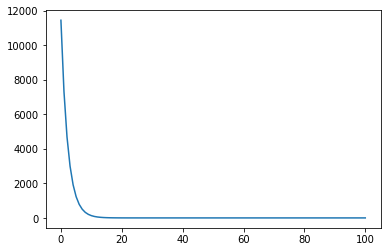

In [20]:
X = np.arange(0,10,0.1)
ε = np.random.randn(len(X))
y = 5*np.sin(X)+9 + ε

learning_rate = 0.1
yhat = np.zeros_like(y) # initial guess
loss = []
loss.append(sum((y-yhat)**2))

# learning
for _ in range(100):
    yhat -= -2*(y-yhat)*learning_rate
    loss.append(sum((y-yhat)**2))
plt.plot(loss)
plt.show()

In practice, however, $y_i$ is known, we estimate the gradient by tree models in each step.

$$
\begin{aligned}
\mathcal{L} &=\sum_{i}\left(y_{i}-\hat{y}_{i}\right)^{2} \\
&=\sum_{j} \sum_{i \in S_{j}}\left(y_{i}-\hat{y}_{i}\right)^{2} \\
&=\sum_{j} \sum_{i \in S_j}\left(y_{i}-\bar{y}_{j}\right)^{2} \\
&=\sum_{i}\left(\sum_{i \in S_{j}} y_{i}^{2}-\left|S_{j}\right| \bar{y}_{j}^{2}\right) \\
&=\sum_{i} y_{i}^{2}-\sum_{j} \frac{\left(\sum_{i \in S_j}y_{i}\right)^2}{n_{j}}\\
&=c-\sum_{j}\frac{G_j^2}{n_j}
\end{aligned}\\
\min \mathcal{L} \Leftrightarrow \min-\sum_j\frac{G_j^2}{n_j}\\
\begin{aligned}
{\text {Gain}} &=-\Delta \mathcal{L}=-\left[\left(-\frac{G_{j L}^{2}}{n_{j L}}\right)+\left(-\frac{G_{j R}^{2}}{n_{j R}}\right)-\left(-\frac{G_{j}^{2}}{n_{j}}\right)\right] \\
&=\frac{G_{j L}^{2}}{n_{j L}}+\frac{G_{j R}^{2}}{n_{j R}}-\frac{\left(G_{j L}+G_{j R}\right)^{2}}{n_{j L}+n_{j R}}
\end{aligned}
$$

In [14]:
class Node:
    def __init__(self, score, maxdepth):
        self.maxdepth = maxdepth 
        self.score = 0 # gain for split
        self.feature = None # split feature
        self.value = None # split point
        self.idx = None # data index
        self.left = None # left child
        self.right = None # right child
        
class DecisionTree:
    def __init__(self, minleaf=5, maxdepth=10):
        self.minleaf = minleaf
        self.maxdepth = maxdepth
        self.root = None
        self.X = None
        self.y = None
    
    def gain(self, lidx, ridx):
        gl = np.sum(self.y[lidx])
        gr = np.sum(self.y[ridx])
        nl = len(lidx)
        nr = len(ridx)
        gain = gl**2/nl+gr**2/nr-(gl+gr)**2/(nl+nr)
        return gain 
        

    def split(self, node):
        if (node.maxdepth==0) or (len(node.idx)<2*self.minleaf):
            return
        for feature in range(self.X.shape[1]):
            for i in node.idx:
                # calculate score
                value = self.X[i,feature]
                lidx = np.nonzero(self.X[:,feature]<=value)[0][node.idx]
                ridx = np.nonzero(self.X[:,feature]> value)[0][node.idx]
                if (len(lidx)<self.minleaf) or (len(ridx)<self.minleaf): continue
                score = self.gain(lidx,ridx)
                if score > node.score:
                    node.feature = feature
                    node.value = value
                    node.score = score
        if node.score:
            node.left = Node(idx=lidx, maxdepth=node.depth-1)
            node.right = Node(idx=ridx, maxdepth=node.depth-1)
            self.split(node.left)
            self.split(node.right)
    
    def fit(X, y):
        self.X = X
        self.y = y
        self.root = Node(idx=np.arange(self.X.shape[0]),maxdepth=self.maxdepth)
        self.split(self.root)
        return self
        
    def predict(X):
        y = []
        for i in range(X.shape[0]):
            node = self.root
            while True:
                if node.score == 0:
                    y.append(np.mean(self.y[node.idx]))
                    break
                if x[i, node.feature] <= node.value:
                    node = node.left
                else:
                    node = node.right
        return np.array(y)
    
class GraidentBoostingClassifier:
    def __init__(self):
        self.estimators = []
        
    @staticmethod
    def sigmoid(x):
        return 1/(1+np.exp(-x))
    
    def negraderiv(self, y, logodds):
        return y-self.sigmoid(logodds)
        
    def fit(self, X, y, maxdepth=5, minleaf=5, lr=0.1, rounds=5):
        self.lr = lr
        self.init = np.ones_like(y)*np.log(np.count_nonzero(y==1)/np.count_nonzero(y==0))
        self.pred = self.init
        for _ in range(rounds):
            residual = self.negraderiv(y, self.pred)
            gbt = DecisionTree(maxdepth=maxdepth, minleaf=minleaf).fit(X, residual)
            self.pred += self.lr*gbt.predict(X)
            self.estimators.append(gbt)
    
    def pred(self, X):
        pred = self.init
        for estimator in self.estimators:
            pred += self.lr*estimator.predict(X)
        return pred        
        
class GradientBoostingRegressor:
    def __init__(self):
        self.estimators = []
        
    def negraderiv(self, y, yhat): # negative gradient derivative
        return 2*(y-yhat)
    
    def fit(self, X, y, lr=0.1, **kwargs):
        self.lr = lr
        self.init = np.ones_like(y)*np.mean(y)
        self.pred = self.init
        for _ in range(rounds):
            residual = self.negraderiv(y, self.pred)
            gbt = DecisionTree(**kwargs).fit(X, residual)
            self.pred += self.lr*gbt.predict(X)
            self.estimators.append(gbt)
            
    def pred(self, X):
        pred = self.init
        for estimator in self.estimators:
            pred += self.lr*estimator.predict(X)
        return pred       

$$
\begin{aligned}
\mathcal{L} &=-\sum_{i}\left[y_{i} \log p_{i}+\left(1+y_{i}\right) \log \left(1-p_{i}\right)\right] \\
&=-\sum_{i}\left[y_{i} \log \left(\frac{1}{1+e^{-f_{i}}}\right)+\left(1-y_{i}\right) \log \left(\frac{e^{-f_{i}}}{1+e^{-f_{i}}}\right)\right]\\
&=-\sum_{i}\left[\log\left(\frac{e^{-f_i}}{1+e^{-f_i}}\right)-y_i\left(-f_i\right)\right]\\
&=-\sum_{i}\left[y_if_i-\log\left(1+e^{f_i}\right)\right]
\end{aligned}\\
\frac{\partial \mathcal{L}}{\partial f_{i}}=-y_{i}+\frac{1}{1+e^{-f i}}
$$

$$
\begin{aligned}
\mathcal{L}^{(t)} &=\ell\left({\bf y},\hat{\bf y}^{(t-1)}+{\bf f}^{(t)}\right)+\Omega\left({\bf f}^{(t)}\right) \\
&=\sum_{j=1}^{m} \sum_{i \in S_j}\left(\ell_{i}^{(t)}+g_{i}^{(t)} f_{j}^{(t)}+\frac{1}{2} h_{i}^{(t)} \left({f_{j}^{(t)}}\right)^2\right)+\left(\gamma m+\frac{1}{2} \lambda \sum_{j=1}^{m} \left({f_{j}^{(t)}}\right)^2\right)\\
&=\sum_{i=1}^{n} \ell_{i}^{(t)}+\sum_{j=1}^{m} G_{j}^{(t)} f_{j}^{(t)}+\frac{1}{2} \sum_{j=1}^{m}\left(H_{j}^{(t)}+\lambda\right) \left({f_{j}^{(t)}}\right)^2+\gamma m
\end{aligned}\\
\frac{\partial \mathcal{L}}{\partial f_{j}^{(t)}}=\sum_{j=1}^{m}\left[G_{j}^{(t)}+\left(H_{j}^{(t)}+\lambda\right) f_{j}^{(t)}\right]=0\\
\Rightarrow f_{j}^{(t)}=-\frac{G_{j}^{(t)}}{H_{j}^{(t)}+\lambda}\\
\mathcal{L}^{(t)}=\sum_{i=1}^{n} \ell_{i}^{(t)}-\frac{1}{2} \sum_{j=1}^{m} \frac{G_{j}^{(t)^{2}}}{H_{j}^{(t)}+\lambda}+\gamma m\\
{\text {Gain }}_j=\frac{1}{2}\left[\frac{G_{j L}^{2}}{H_{j L}+\lambda}+\frac{G_{j R}^{2}}{H_{j R}+\lambda}-\frac{\left(G_{j L}+G_{j R}\right)^{2}}{H_{j L}+H_{j R}+\lambda}\right]-\gamma
$$

In [15]:
class Node:
    def __init__(self):
        
        self.score = 0
        self.samplecols = None
        self.left = None
        self.right = None
        
class XGBoostTree:
    def __init__(self, maxdepth=10, minleaf=5, gamma=1, eps=0.01, colsample=0.5, minchildweight=1, lmbda_=1):
        self.maxdepth = maxdepth
        self.minleaf = minleaf
        self.colsample = colsample
        self.minchildweight = minchildweight
        self.lmbda = lmbda
        self.gamma = gamma
        self.root = None
        self.X = None
        self.y = None
    
    @staticmethod
    def gain(self, lidx, ridx):
        gl = sum(self.grad[lidx])
        gr = sum(self.grad[ridx])
        hl = sum(self.hess[lidx])
        hr = sum(self.hess[ridx])
        return 0.5*(gl**2/(hl+self.lmbda)+gr**2/(hr+self.lmbda)-(gl+gr)**2/(hl+hr+self.lmbda))-self.gamma
    
    @staticmethod
    def split(self, node):
        if (node.maxdepth==0) or (len(node.idx)<2*self.minleaf):
            return
        samplecols = np.random.permutation(self.X.shape[1])[:round(self.colsample*self.X.shape[1])]
        for feature in samplecols:
            for i in node.idx:
                value = self.X[i,feature]
                lidx = np.nonzero(self.X[:,feature]<=value)[0][node.idx]
                ridx = np.nonzero(self.X[:,feature]> value)[0][node.idx]
                if (len(lidx)<self.minleaf) \
                or (len(ridx)<self.minleaf) \
                or (sum(self.hess[lidx])<self.minchildweight) \
                or (sum(self.hess[ridx])<self.minchildweight): continue
                score = self.gain(lidx,ridx)
                if score > node.score:
                    node.feature = feature
                    node.value = value
                    node.score = score
        if node.score:
            node.samplecols = samplecols
            node.left = Node(idx=lidx, maxdepth=node.depth-1)
            node.right = Node(idx=ridx, maxdepth=node.depth-1)
            self.split(node.left)
            self.split(node.right)
    
    def fit(self, X, grad, hess):
        self.X = X
        self.grad = grad
        self.hess = hess
        self.root = Node()
        self.split(self.root)
        return self
    
    def predict(X):
        y = []
        for i in range(X.shape[0]):
            node = self.root
            while True:
                if node.score == 0:
                    y.append(-np.sum(self.grad[node.idx])/(np.sum(self.hess[node.idx])+self.lmbda))
                    break
                if x[i, node.feature] <= node.value:
                    node = node.left
                else:
                    node = node.right
        return np.array(y)
    
    def weighted_quantile_sketch():
        ...
    
class XGBoostClassifier:
    def __init__(self, subsample=0.5):
        self.subsample = subsample
    
    @staticmethod
    def sigmoid(x):
        return 1/(1+np.exp(-x))
        
    def grad(self, y, logodds):
        return self.sigmoid(logodds)-y
    
    def hess(self, y, logodds):
        return self.sigmoid(logodds)*(1-self.sigmoid(logodds))
        
    def fit(self, X, y, lr=0.1, **kwargs):
        self.X = X
        self.y = y
        self.init = np.ones_like(y)*np.log(np.count_nonzero(y==1)/np.count_nonzero(y==0))
        self.pred = self.init
        for _ in range(rounds):
            sample = np.random.permutation(self.X.shape[0])[:round(self.subsample*self.X.shape[0])]
            grad = self.grad(self.y[sample], self.pred[sample])
            hess = self.hess(self.y[sample], self.pred[sample])
            xgbt = XGBoostTree(**kwargs).fit(self.X[sample], grad, hess)
            sel.pred += self.lr*xgbt.predict(self.X)
            self.estimators.append(xgbt)
    
    def predict(self, X):
        pred = self.init
        for estimator in self.estimators:
            pred += self.lr*estimator.predict(X)
        return pred
    
class XGBoostRegressor:
    def __init__(self, subsample=0.5):
        self.subsample = subsample
    
    def grad(self, y, yhat):
        return 2*(yhat-y)
    
    def hess(self, y, yhat):
        return np.ones_like(y)*2

    def fit(self, X, y, lr=0.1, **kwargs):
        self.X = X
        self.y = y
        self.lr = lr 
        self.init = np.ones_like(y)*np.mean(y)
        self.pred = self.init
        for _ in range(rounds):
            sample = np.random.permutation(self.X.shape[0])[:round(self.subsample*self.X.shape[0])]
            grad = self.grad(self.y[sample], self.pred[sample])
            hess = self.hess(self.y[sample], self.pred[sample])
            xgbt = XGBoostTree(**kwargs).fit(self.X[sample], grad, hess)
            sel.pred += self.lr*xgbt.predict(self.X)
            self.estimators.append(xgbt)
    
    def predict(self, X):
        pred = self.init
        for estimator in self.estimators:
            pred += self.lr*estimator.predict(X)
        return pred

## GAN